In [17]:
from scipy.stats import poisson, binom, expon, gamma
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Poisson, Exponential, and Gamma distribution model different aspects of the same process — the Poisson process.
Poisson distribution is used to model the # of events in the future, Exponential distribution is used to predict the wait time until the very first event, and Gamma distribution is used to predict the wait time until the k-th event.

## Poisson

In [18]:
n=20 #n of trials, time intervals
k=np.arange(0, n+1)
mu=5 #expected number of successes in interval
probs=poisson.pmf(k=k, mu=mu)

<AxesSubplot:>

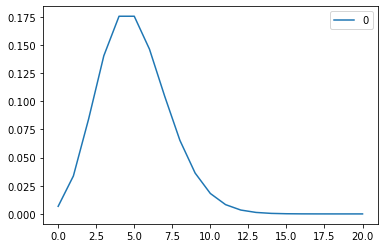

In [19]:
#most probable number of events
df_pois=pd.DataFrame(probs)
df_pois.plot()

In [20]:
#probability having up to mu events
probs_cum=poisson.cdf(k=10, mu=mu)
probs_cum

0.9863047314016171

## Binomial

In [21]:
#binom needs more info not just number of successes but number of trials and probability of success
probs_binom=binom.pmf(k=k, n=n, p=mu/n)

<AxesSubplot:>

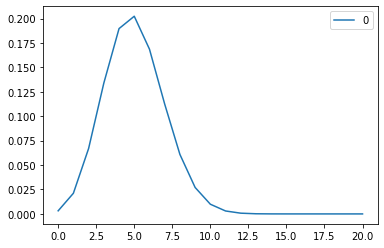

In [22]:
#most probable number of events
df_binom=pd.DataFrame(probs_binom)
df_binom.plot()

## Exponential

In [23]:
#If the number of events per unit time follows a Poisson distribution, 
#then the amount of time between events follows the exponential distribution.
x=np.linspace(expon.ppf(0.01),expon.ppf(0.9999999999), 100)
#scale parameter which is the inverse of the rate parameter λ = 1/β
probs_exp=expon.pdf(x,  scale = 1/(mu/n))

In [24]:
1/(mu/n), mu/n

(4.0, 0.25)

<AxesSubplot:>

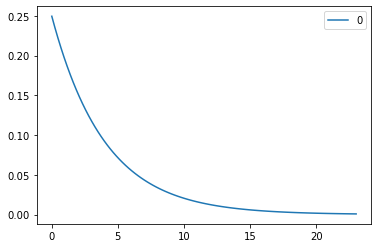

In [25]:
df_exp=pd.DataFrame(probs_exp)
df_exp.index=x
df_exp.plot()

In [26]:
expon.cdf(4, scale = 1/(mu/n))

0.6321205588285577

In [27]:
expon.cdf(5, scale = 1/(mu/n))

mean, var, skew, kurt = expon.stats(moments='mvsk', scale = 1/(mu/n))
#average waiting time for 1 event happen
mean

array(4.)

In [28]:
var

array(16.)

In [29]:
#Find the maximum wait time experienced 50% of the time
#Find the 50th percentile, meaning, in 50% of interactions, 
#the clerk spends x minutes or less; find x. To solve this, we 
#use the percent point function, this is the inverse of the cumulative density function, and it works in percentiles.
#http://connor-johnson.com/2018/09/09/exponential-random-variable-examples/
expon.ppf(0.5, scale=1/(mu/n))

2.772588722239781

In [30]:
#find probability taht waiting time is between 6 to 8 time intervals
expon.cdf(8, scale=1/(mu/n)) - expon.cdf(6, scale=1/(mu/n))

0.08779487691181709

In [31]:
#find probability taht waiting time is between 4 to 6 time intervals
expon.cdf(6, scale=1/(mu/n)) - expon.cdf(4, scale=1/(mu/n))

0.14474928102301254

In [32]:
#find probability that waiting time is between 1 to 4 time intervals
expon.cdf(4, scale=1/(mu/n)) - expon.cdf(1, scale=1/(mu/n))

0.41092134189996254

## Gamma

In [64]:
# k : the number of events for which you are waiting to occur.
# λ : the rate of events happening following Poisson dist.
k=1 #k=1 makes it an exponential function
lambda_=mu/n
mean, var, skew, kurt = gamma.stats(k, moments='mvsk')

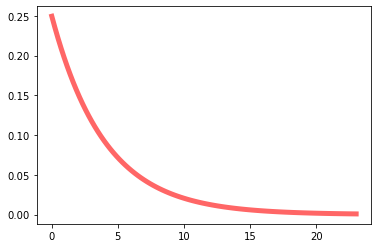

In [65]:
rvx = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
plt.plot(x, gamma.pdf(x, k, scale=1/lambda_),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

In [66]:
mu, n

(5, 20)

In [67]:
#if we wait more events to happen wait time will be longer
gamma.pdf(5, k, scale=1/(mu/n))

0.07162619921504752

In [68]:
gamma.pdf(6, k, scale=1/(mu/n))

0.055782540037107455

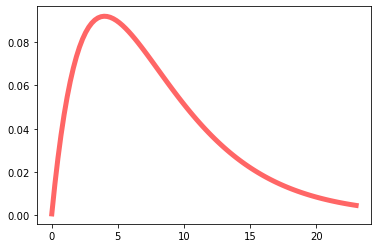

In [69]:
k=2
lambda_=mu/n
mean, var, skew, kurt = gamma.stats(k, moments='mvsk')

rvx = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
plt.plot(x, gamma.pdf(x, k, scale=1/lambda_),
       'r-', lw=5, alpha=0.6, label='gamma pdf')